## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# columns: 
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no } 

cols = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']
nephritis = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv', 
    names=cols
)

# We only have yes/no data here
# 'Manually' re-encoding to bool
nephritis = nephritis.replace({'no': 0.0, 'yes': 1.0})
print(nephritis.info())

# Unneeded, but just in case
nephritis = nephritis.dropna()
nephritis.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 41
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               120 non-null    int64  
 1   nausea             120 non-null    float64
 2   lumbar_pain        120 non-null    float64
 3   urine_pushing      120 non-null    float64
 4   micturition_pains  120 non-null    float64
 5   burning            120 non-null    float64
 6   nephritis          120 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.5 KB
None


,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,0.0,1.0,0.0,0.0,0.0,0.0
35,9,0.0,0.0,1.0,1.0,1.0,0.0
35,9,0.0,1.0,0.0,0.0,0.0,0.0
36,0,0.0,0.0,1.0,1.0,1.0,0.0
36,0,0.0,1.0,0.0,0.0,0.0,0.0


Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [0]:
# Investigating if we have imbalanced classes
nephritis['nephritis'].value_counts(normalize=True)

0.0    0.583333
1.0    0.416667
Name: nephritis, dtype: float64

In [0]:
X = nephritis.drop(columns=['nephritis'])
y = nephritis['nephritis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [0]:
transformer = ColumnTransformer(
    [('scale_temp', StandardScaler(), ['temp'])], 
    remainder='passthrough'
)

transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

In [0]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')

train_score: 1.0
test_score: 1.0


Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [0]:
# 100% accuracy on training data is a little sketchy,
# and makes you think you're overfit.

# But uhhh, the test score is pretty dang high too though, 
# so we might just have easily separable data given these features.

# Will try and get best fit with CV.

Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

In [0]:
# k=5 seems pretty hard to beat... but ok...
grid = {'n_neighbors': list(range(1, 76))}
model = GridSearchCV(KNeighborsClassifier(), grid)
model.fit(X_train, y_train)

print(f'Best params: {model.best_params_}')

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')

Best params: {'n_neighbors': 1}
train_score: 1.0
test_score: 1.0


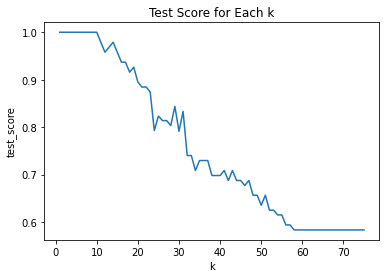

In [0]:
plt.plot(grid['n_neighbors'], 
         model.cv_results_['mean_test_score'])
plt.title('Test Score for Each k')
plt.xlabel('k')
plt.ylabel('test_score')
plt.show()

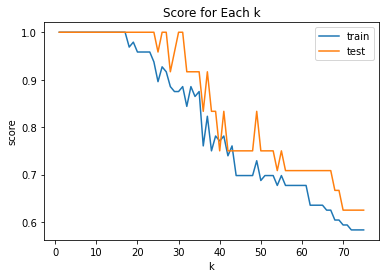

In [0]:
# Performing same thing manually without CV
# Going to put in a fancy progress bar with tqdm
from tqdm.notebook import tqdm

ks = range(1, 76)

train_scores = []
test_scores = []
for k in tqdm(ks):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)

  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)


plt.plot(ks, train_scores, label='train')
plt.plot(ks, test_scores, label='test')
plt.title('Score for Each k')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()